# Numerical Solutions to the Advection-Diffusion Eqaution in 1-D

A common equation in transport phenomena, either mass or heat. 

## Mathematical Problem  

The advection-diffusion equation in one dimmesion ($x$) is   

\begin{align}
  \frac{\partial u}{\partial t} + a \frac{\partial u}{ \partial x} = \kappa \frac{\partial^2 u}{\partial x^2}
\end{align}

<!-- 
https://nicoguaro.github.io/posts/infinite_fdm/
https://www.math.utah.edu/~vshankar/5620/IMEX.pdf
http://runge.math.smu.edu/Math6321/_downloads/imex.pdfs
http://www.math.utah.edu/~vshankar/5620/Ascher1995.pdf
https://ocw.mit.edu/courses/mathematics/18-086-mathematical-methods-for-engineers-ii-spring-2006/video-lectures/

https://www.math.ucla.edu/~wotaoyin/splittingbook/ch3-macnamara-strang.pdf  
https://ocw.mit.edu/courses/mathematics/18-336-numerical-methods-for-partial-differential-equations-spring-2009/lecture-notes/MIT18_336S09_lec20.pdf

https://scicomp.stackexchange.com/questions/29695/general-questions-regarding-stability-for-time-integration-of-operator-split-pde?rq=1

http://dergipark.org.tr/tr/download/article-file/387502
https://scicomp.stackexchange.com/questions/24561/strang-splitting?rq=1
https://scicomp.stackexchange.com/questions/29695/general-questions-regarding-stability-for-time-integration-of-operator-split-pde?rq=1
-->

## Analytical Solution 
\begin{align}
    U(x,t) = \frac{1}{\sqrt{4\pi \kappa t}} \exp \left( - \frac{(x-(x_0+at))^2}{4\kappa t} \right)
\end{align}



## Numerical Approaches 

For numerical treatment of the advection-diffusion equation we condsider   

\begin{align}
  u_t = \mathcal{A}(u) + \mathcal{B}(u)
\end{align}

where 

\begin{align}
  \mathcal{A}(u) = a \frac{\partial u}{ \partial x} \;\;\; \text{ and } \;\;\; \mathcal{B}(u) = \kappa \frac{\partial^2 u}{\partial x^2} \;\;.
\end{align}

### Operators Splitting (Fractional Step)  Methods

__Goundov Spliting__  
The simple first-order method for solving a the advection-diffuson equation 

\begin{align}
\begin{aligned}
U^* &= \mathcal{N}_{\mathcal{A}}(U^n,k), \\
U^{n+1} &= \mathcal{N}_{\mathcal{B}}(U^*,k)
\end{aligned}
\end{align}

where $\mathcal{N}_{\mathcal{A}}(U^n,k)$ solves $u_t = \mathcal{A}(u)$ over a time step $k$ with inital conditions of $U^n$ and $\mathcal{N}_{\mathcal{B}}(U^*,k)$ similarily solves  $u_t = \mathcal{B}(u)$ over a time step $k$ but with inital conditions of $U^*$.  


__Strang Spliting__  
A second-order method is  
\begin{align}
\begin{aligned}
U^* &= \mathcal{N}_{\mathcal{A}}(U^n,k/2), \\
U^{**} &= \mathcal{N}_{\mathcal{B}}(U^*,k), \\
U^{n+1} &= \mathcal{N}_{\mathcal{A}}(U^{**},k/2)
\end{aligned}
\end{align}


### Accuracy of Operator Splitting 


First we consider a linear system of ODEs    
\begin{align}
  u_t = \mathcal{A}(u) + \mathcal{B}(u)
\end{align}
analogous to our PDE of interest. The analytical solution to equation above is  

\begin{align}
  u(h) = e^{h(A + B)}u(0)
\end{align}

at time $h$ with $u(0)$ being the initial condition ( _LeVeque, 2007_ ). If we use a fractional step method like the one outline above, but instead of numerical methods to solve operators we use the exact solution so that we have 

\begin{align}
  \mathcal{N}_{\mathcal{A}}(U^n,k) = e^{A k}U, && \mathcal{N}_{\mathcal{B}}(U^n,k) = e^{Bk}U .
\end{align}  

Therefore, first-order operator splitting method with analytical solutions to 'sub-problems' is 
\begin{align}
  U^{n+1} &= e^{Bk}U^* = e^{Bk}e^{Ak}U^n 
\end{align}  
whereas the exact solution would be 
\begin{align}
  u(t_{n+1}) = e^{k(A + B)}u(t_n) \;\; .
\end{align}

To see the order of accuracy our operator splitting method achieves as compared to the analytical solution we can use the Taylor Series Expansion of the matrix exponentials ( _LeVeque, 2007_ ) such that, 

\begin{align} 
  e^{k(A + B)} = I + k(A+B) + \frac12 k^2(A+B)^2 + \ldots, 
\end{align}
for the analytical solution, whereas 
\begin{align} 
\begin{aligned}
  e^{Bk}e^{Ak}U^n  &= \left(I + kA + \frac12 k^2(A)^2 + \ldots \right)\left(I + kB + \frac12 k^2(B)^2 + \ldots \right) \\
                    &= I + k(A+B) + \frac12 k^2(A^2 + 2AB +B^2) + \ldots 
\end{aligned}
\end{align}
for the operator splitting method ($I$ is identity matrix, _LeVeque, 2007_ ). Therefore the operator splitting methods does not equate to the analytical solution unless 
\begin{align} 
  (A+B)^2 = (A^2 + 2AB +B^2) 
\end{align}
but, given that matrix multiplication is generally not commutative (i.e. $AB \neq BA$) then the operator splitting only equals the exact solution under the special cases where $A$ and $B$ commute ( _LeVeque, 2007_ ). Multiplication of matrices $A$ and $B$ only commute when the matrices, are both diagonal, are simultaneously diagonalizable (i.e. share eigenvectors), and some other special cases. When the matrices (or operators) commute all the terms in the Taylor Series Expansions agree and operator splitting method is the exact solution. In practice in commutation is achieved this means no accuracy is lost by the splitting operations, only by the numerical methods used to solve each 'sub-equation'. 

So, we return to the linear one-dimensional adevection-diffusion equation 

\begin{align}
  \frac{\partial u}{\partial t} + a \frac{\partial u}{ \partial x} = \kappa \frac{\partial^2 u}{\partial x^2}
\end{align}

where 

\begin{align}
  \mathcal{A}(u) = a \frac{\partial u}{ \partial x} \;\;\; \text{ and } \;\;\; \mathcal{B}(u) = \kappa \frac{\partial^2 u}{\partial x^2} \;\;.
\end{align}
We want to test whether the operators ($\mathcal{A}(u) and \mathcal{B}(u)$) commute so we compute  
\begin{align} 
\begin{aligned}
    AB = a \frac{\partial u}{ \partial x} \kappa \frac{\partial^2 u}{\partial x^2} = a \kappa \frac{\partial^3 u}{\partial x^3}
\end{aligned}
\end{align}
and 
\begin{align} 
\begin{aligned}
    BA = \kappa \frac{\partial^2 u}{\partial x^2} a \frac{\partial u}{ \partial x} = \kappa a\frac{\partial^3 u}{\partial x^3} \;\;.
\end{aligned}
\end{align}
The operators ($AB = BA$) and therefore the first order operator splitting method is the exact solution for the one dimensional scalar equation.  Therefore, their is no loss of accuracy from the operator splitting and no need to implement a higher-order splitting method that would be more computationally inefficient.

In [1]:
# Global
import sys 
import numpy as np 
from scipy import linalg as LA
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 14

# Local
sys.path.append('../')
from advdiff.model import advection,Diffusion

In [2]:
def η(x, t=0.1, κ=3e-6, a=3e-6, x_0=np.pi):
    return (1 / ((4*np.pi*κ*t)**0.5)) * np.exp(-(((x-(x_0 + a*t))**2)/(4*κ*t)))

params = {'L':6.*np.pi,'nx':500,'nt':1191}
adv_coef  = {'a':3, 'σ':0.1}
diff_coef = {'κ':3e-1, 'σ':0.1}

Adv  = advection(params,adv_coef)
Adv.U[0,:] = η(Adv.x,0.1,diff_coef['κ'],adv_coef['a'])

Diff = Diffusion(params,diff_coef)
Diff.U[0,:] = η(Adv.x,0.1,diff_coef['κ'],adv_coef['a'])

UStar = np.zeros_like(Diff.U)
U = np.copy(Diff.U)  # numerical sol. array
u = np.copy(Diff.U)  # analytical sol. array

for t in range(params['nt']-1):
    UStar[t,:] = Diff.crank_nicolson(t,U,Adv.dt)
    U[t+1,:]   = Adv.UpWind(t,UStar)
    u[t+1,:] = η(Adv.x,(t*Adv.dt)+0.1, diff_coef['κ'],adv_coef['a'])
    

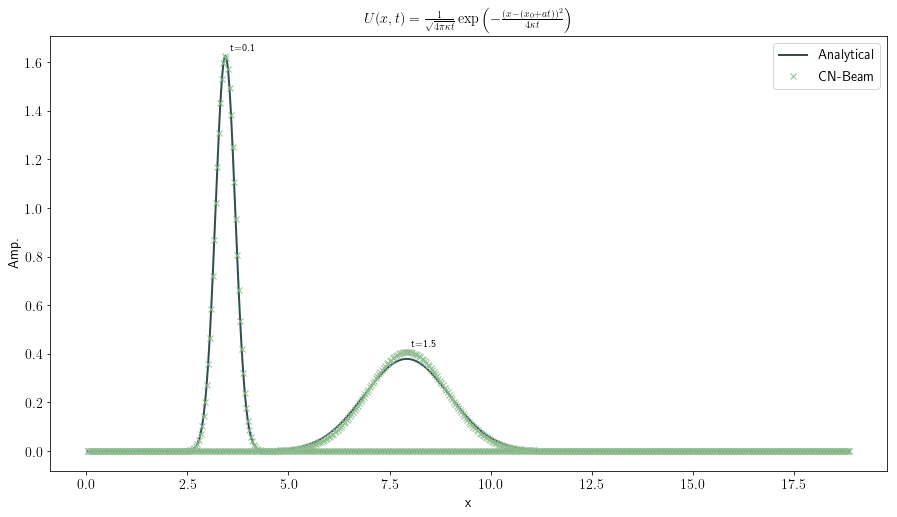

In [3]:
fig, ax = plt.subplots(1,1,figsize=(15,8))

ax.plot(Adv.x,U[0,:],lw=2, color = 'darkslategrey',label='Analytical')
ax.plot(Adv.x,u[0,:],'x',lw=2, color = 'darkseagreen',label='CN-Beam')
ax.plot(Adv.x,U[-1,:],color = 'darkslategrey',lw=2)
ax.plot(Adv.x,u[-1,:],'x', color = 'darkseagreen', lw=2)

ax.set_ylabel('Amp.')
ax.set_xlabel(' x ')
ax.annotate(r't=0.1', (Adv.x[90],u[0,90]),(5,5),textcoords='offset points')
ax.annotate(r't=1.5', (Adv.x[209],u[-1,209]),(5,5),textcoords='offset points')
ax.set_title(r'$U(x,t) = \frac{1}{\sqrt{4\pi \kappa t}} \exp \left( - \frac{(x-(x_0+at))^2}{4\kappa t} \right)$',fontsize = 'x-large')
plt.legend()

In [4]:
#run ./AdvDiff/linear_converge.py

## Non-Linear Equations  

An example of a non-linear advection diffusion equation is Burger's Equation  

\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \kappa \frac{\partial ^2u}{\partial x^2} \; . 
\end{equation}

Because this methods is non-linear operator splitting will not produce the an exact result. Therefore we will use Burger's Equation to compare between first order Goundov and second order Strang Splitting. 

Following (Barba et al., 2019) we will use the initial condition  

\begin{eqnarray}
u &=& -\frac{2 \kappa}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-x^2}{4 \kappa} \bigg) + \exp \bigg(\frac{-(x-2 \pi)^2}{4 \kappa} \bigg)
\end{eqnarray}

that allows the analytical solution

\begin{eqnarray}
u &=& -\frac{2 \kappa}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-(x-4t)^2}{4 \kappa (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \kappa(t+1)} \bigg) \;\; .
\end{eqnarray}

Since evaluating $\phi$ manually has possibility of user error we will evaluate the initial condition and analytical solution through `sympy` python's symbolic algebra library (following the lead of (Barba et al., 2019)). 

In [5]:
import sympy 
from sympy import init_printing
from sympy.utilities.lambdify import lambdify
init_printing(use_latex=True)

x, kappa, t = sympy.symbols('x kappa t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * kappa * (t + 1))) +
       sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * kappa * (t + 1))))

phiprime = phi.diff(x)

u = -2 * kappa * (phiprime / phi) + 4
ufunc = lambdify((t, x, kappa), u)

xs = np.linspace(0,6*np.pi)
ys = ufunc(0,xs,1e0)

We know 

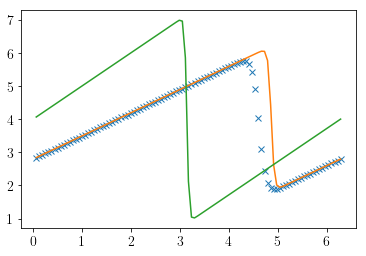

In [6]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from advdiff.model import advection


########################################################
#################   Init. Constant   ###################
########################################################
κ  = 0.07                  # Diffusivity
L  = 2*np.pi               # Domain Length
nx = 101                   # Num. grid cells
dx = L/(nx-1)              # grid spacing

nt = 100                   # Num time steps
dt = dx * κ                # time step

########################################################
##################   Init. Domain   ####################
########################################################
r  = (κ*dt)/(2*dx**2)      # matrix const.
x  = np.linspace(dx,L,nx)  # spatial grid

numer  = np.zeros((nt,nx))   # solution array
exact  =  np.zeros((nt,nx))

numer[0,:] = ufunc(0,x,κ)
exact[0,:] = ufunc(0,x,κ)

# Mat. A
A = np.diagflat([[(1+2*r) for __ in range(nx)]]) + \
    np.diagflat([[  (-r)  for __ in range(nx-1)]],1) +\
    np.diagflat([[  (-r)  for __ in range(nx-1)]],-1)

A[0,-1] = -r
A[-1,0] = -r

# Mat. B
B = np.diagflat([[(1-2*r) for __ in range(nx)]]) + \
    np.diagflat([[  (r)   for __ in range(nx-1)]],1) +\
    np.diagflat([[  (r)   for __ in range(nx-1)]],-1)

B[0,-1] = r
B[-1,0] = r

u_star = np.zeros((nt,nx))
u_star2 = np.zeros((nt,nx))

for j in range(0,nt-1):
    b     = B.dot(numer[j,:])                 # left vect.
    u_star[j,:]  = LA.solve(A,b)    # itterative solv.
    u_star[j,-1] = u_star[j,-1]
    
    numer[j+1,1:] = u_star[j,1:] - ((dt*u_star[j,1:])/dx) * (u_star[j,1:] - u_star[j,0:-1])
    numer[j+1,0] = u_star[j,0] - ((dt*u_star[j,0])/dx)* (u_star[j,0] - u_star[j,-1])
    exact[j+1,:] = ufunc(dt*j,x,κ)
    

plt.plot(x,numer[-1,:],'x')  
plt.plot(x,exact[-1,:])    

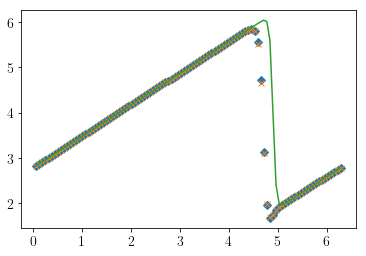

In [11]:
from advdiff.model import AdvDiff

params = {'L':2*np.pi,'nx':100,'nt':100,'linear':False}
coeffs = {'κ':0.07, 'a':10., 'σ':1.0}

model = AdvDiff(params,coeffs)
model.U[0,:] = ufunc(0,model.x,model.κ)

Strang = model.Strang('BeamWarming','w')
Goundov = model.Goundov('BeamWarming','w')

exact  =  np.zeros((model.nt,model.nx))

for j in range(0,model.nt):
    exact[j,:] = ufunc(model.dt*j,model.x,model.κ)

plt.plot(model.x,Goundov[-1],'D')
plt.plot(model.x,Strang[-1,:],'x')  
plt.plot(model.x,exact[-1,:])    


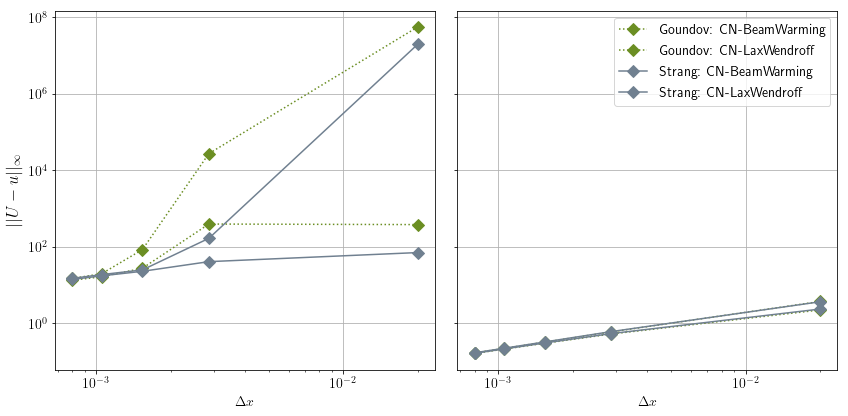

In [8]:
run ./AdvDiff/nonlinear.py

Tests with a liberal timestep restriction($\Delta t = 10 \Delta x \kappa$). The liberal timestep restriction is used to demonstrate the higher accuracy of Strang splitting. When a more partical timestep is used, $\Delta t \rightarrow 0$ and the first order accurate Goundov Splitting convergences to the true solution. 

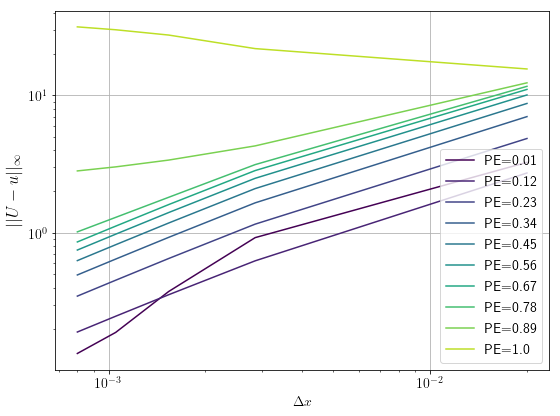

In [9]:
run AdvDiff/Pecelt_Space.py

higher the Peclet number the greater the non-linearity!!!

## References  

- Barba et al., (2018). _CFD Python: the 12 steps to Navier-Stokes equations_. Journal of Open Source Education, 1(9), 21, https://doi.org/10.21105/jose.00021 

- Langtangen and  Linge. Finite Difference Computing with PDEs - A Modern Software Approach, Texts in Computational Science and Engineering, Springer, 2016, https://doi.org/10.1007/978-3-319-55456-3  

- LeVeque, Randall J. 2002. \textit{Finite Volume Methods for Hyperbolic Problems}. Cambridge Texts in Applied Mathematics. Cambridge: Cambridge University Press. doi:10.1017/CBO9780511791253.

- LeVeque, Randall J. 2007. _Finite Difference Methods for Ordinary and Partial Differential Equations: Steady-State and Time-dependent Problems_. Classics in Applied Mathematics. Society of Industrial and Applied Mathematics (SIAM). doi:10.1137/1.9780898717839
